In [18]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
os.listdir('C:/Users/Ardian/Documents/Kuliah Ardian/Semester 7/Bangkit/Dataset Gabungan')

['Batik Buketan',
 'Batik Cendrawasih',
 'Batik Ceplok',
 'Batik Corak Insang',
 'Batik Dayak',
 'Batik Gunungan',
 'Batik Ikat Celup',
 'Batik Kawung',
 'Batik Lereng',
 'Batik Megamendung',
 'Batik Nitik',
 'Batik Parang',
 'Batik Prada',
 'Batik Sekar',
 'Batik Sidoluhur',
 'Batik Truntum',
 'Batik Tumpal',
 'test',
 'train',
 'val']

In [20]:
directory = 'C:/Users/Ardian/Documents/Kuliah Ardian/Semester 7/Bangkit/Dataset Gabungan'

In [21]:
# import os
# import shutil
# from sklearn.model_selection import train_test_split
# from collections import Counter

# # Define the source directory and target directories
# source_dir = 'C:/Users/Ardian/Documents/Kuliah Ardian/Semester 7/Bangkit/Dataset Gabungan'
# train_dir = os.path.join(source_dir, 'train')
# val_dir = os.path.join(source_dir, 'val')
# test_dir = os.path.join(source_dir, 'test')

# # Create target directories if they don't exist
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(val_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)

# # Get the list of classes
# classes = [d for d in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, d)) and d not in ['train', 'val', 'test']]

# # Split the dataset
# for cls in classes:
#     class_dir = os.path.join(source_dir, cls)
#     images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
    
#     train_images, temp_images = train_test_split(images, test_size=0.3, random_state=42)
#     val_images, test_images = train_test_split(temp_images, test_size=0.3333, random_state=42)  # 0.3333 * 0.3 = 0.1
    
#     # Copy images to train directory
#     train_class_dir = os.path.join(train_dir, cls)
#     os.makedirs(train_class_dir, exist_ok=True)
#     for img in train_images:
#         shutil.copy(os.path.join(class_dir, img), os.path.join(train_class_dir, img))
    
#     # Copy images to validation directory
#     val_class_dir = os.path.join(val_dir, cls)
#     os.makedirs(val_class_dir, exist_ok=True)
#     for img in val_images:
#         shutil.copy(os.path.join(class_dir, img), os.path.join(val_class_dir, img))
    
#     # Copy images to test directory
#     test_class_dir = os.path.join(test_dir, cls)
#     os.makedirs(test_class_dir, exist_ok=True)
#     for img in test_images:
#         shutil.copy(os.path.join(class_dir, img), os.path.join(test_class_dir, img))

# # Print the number of images in each class for the training, validation, and test datasets
# train_class_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in classes}
# val_class_counts = {cls: len(os.listdir(os.path.join(val_dir, cls))) for cls in classes}
# test_class_counts = {cls: len(os.listdir(os.path.join(test_dir, cls))) for cls in classes}

# print("Number of images in each class for the training dataset:")
# for cls, count in train_class_counts.items():
#     print(f"{cls}: {count}")

# print("\nNumber of images in each class for the validation dataset:")
# for cls, count in val_class_counts.items():
#     print(f"{cls}: {count}")

# print("\nNumber of images in each class for the test dataset:")
# for cls, count in test_class_counts.items():
#     print(f"{cls}: {count}")


In [22]:
train_dir = os.path.join(directory, 'train')
val_dir = os.path.join(directory, 'val')
test_dir = os.path.join(directory, 'test')

In [23]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_dataset = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1656 images belonging to 17 classes.
Found 430 images belonging to 17 classes.


In [24]:
# Load an example image
img_path = os.path.join(train_dir, os.listdir(train_dir)[0], os.listdir(os.path.join(train_dir, os.listdir(train_dir)[0]))[0])
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))

# Convert the image to an array
sample_array = tf.keras.preprocessing.image.img_to_array(img)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (224, 224, 3)


In [43]:
# Count the number of images in each class for the training dataset
train_class_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in os.listdir(train_dir)}
print("Number of images in each class for the training dataset:")
for cls, count in train_class_counts.items():
    print(f"{cls}: {count}")

# Count the number of images in each class for the validation dataset
val_class_counts = {cls: len(os.listdir(os.path.join(val_dir, cls))) for cls in os.listdir(val_dir)}
print("\nNumber of images in each class for the validation dataset:")
for cls, count in val_class_counts.items():
    print(f"{cls}: {count}")

# Count the number of images in each class for the testing dataset
test_class_counts = {cls: len(os.listdir(os.path.join(test_dir, cls))) for cls in os.listdir(test_dir)}
print("\nNumber of images in each class for the testing dataset:")
for cls, count in test_class_counts.items():
    print(f"{cls}: {count}")

Number of images in each class for the training dataset:
Batik Buketan: 98
Batik Cendrawasih: 98
Batik Ceplok: 98
Batik Corak Insang: 98
Batik Dayak: 98
Batik Gunungan: 98
Batik Ikat Celup: 90
Batik Kawung: 98
Batik Lereng: 97
Batik Megamendung: 98
Batik Nitik: 97
Batik Parang: 98
Batik Prada: 98
Batik Sekar: 98
Batik Sidoluhur: 98
Batik Truntum: 98
Batik Tumpal: 98

Number of images in each class for the validation dataset:
Batik Buketan: 28
Batik Cendrawasih: 28
Batik Ceplok: 16
Batik Corak Insang: 28
Batik Dayak: 26
Batik Gunungan: 28
Batik Ikat Celup: 20
Batik Kawung: 28
Batik Lereng: 16
Batik Megamendung: 28
Batik Nitik: 16
Batik Parang: 28
Batik Prada: 28
Batik Sekar: 28
Batik Sidoluhur: 28
Batik Truntum: 28
Batik Tumpal: 28

Number of images in each class for the testing dataset:
Batik Buketan: 14
Batik Cendrawasih: 14
Batik Ceplok: 8
Batik Corak Insang: 14
Batik Dayak: 13
Batik Gunungan: 14
Batik Ikat Celup: 10
Batik Kawung: 14
Batik Lereng: 8
Batik Megamendung: 14
Batik Nitik:

In [ ]:
import pandas as pd

# Create DataFrames for each dataset
train_df = pd.DataFrame(list(train_class_counts.items()), columns=['Class', 'Train Count'])
val_df = pd.DataFrame(list(val_class_counts.items()), columns=['Class', 'Validation Count'])
test_df = pd.DataFrame(list(test_class_counts.items()), columns=['Class', 'Test Count'])

df_counts = train_df.merge(val_df, on='Class').merge(test_df, on='Class')

df_counts

,Class,Train Count,Validation Count,Test Count
0,Batik Buketan,98,28,14
1,Batik Cendrawasih,98,28,14
2,Batik Ceplok,98,16,8
3,Batik Corak Insang,98,28,14
4,Batik Dayak,98,26,13
5,Batik Gunungan,98,28,14
6,Batik Ikat Celup,90,20,10
7,Batik Kawung,98,28,14
8,Batik Lereng,97,16,8
9,Batik Megamendung,98,28,14


In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the MobileNet model with pre-trained weights, excluding the top layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(classes), activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

In [27]:
# Train the model
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=val_dataset,
    callbacks=[early_stopping, reduce_lr]
)

# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training the model
history_fine = model.fit(
    train_dataset,
    epochs=50,
    validation_data=val_dataset,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
52/52 [==============================] - 51s 932ms/step - loss: 3.0335 - accuracy: 0.1196 - val_loss: 2.2562 - val_accuracy: 0.4837 - lr: 0.0010
Epoch 2/50
52/52 [==============================] - 64s 1s/step - loss: 2.1908 - accuracy: 0.3056 - val_loss: 1.3309 - val_accuracy: 0.6884 - lr: 0.0010
Epoch 3/50
52/52 [==============================] - 63s 1s/step - loss: 1.6805 - accuracy: 0.4535 - val_loss: 1.0287 - val_accuracy: 0.7070 - lr: 0.0010
Epoch 4/50
52/52 [==============================] - 65s 1s/step - loss: 1.4312 - accuracy: 0.5543 - val_loss: 0.8105 - val_accuracy: 0.7907 - lr: 0.0010
Epoch 5/50
52/52 [==============================] - 70s 1s/step - loss: 1.2126 - accuracy: 0.6178 - val_loss: 0.7543 - val_accuracy: 0.7814 - lr: 0.0010
Epoch 6/50
52/52 [==============================] - 54s 1s/step - loss: 1.0724 - accuracy: 0.6564 - val_loss: 0.6789 - val_accuracy: 0.8233 - lr: 0.0010
Epoch 7/50
52/52 [==============================] - 45s 875ms/step - loss: 0.99

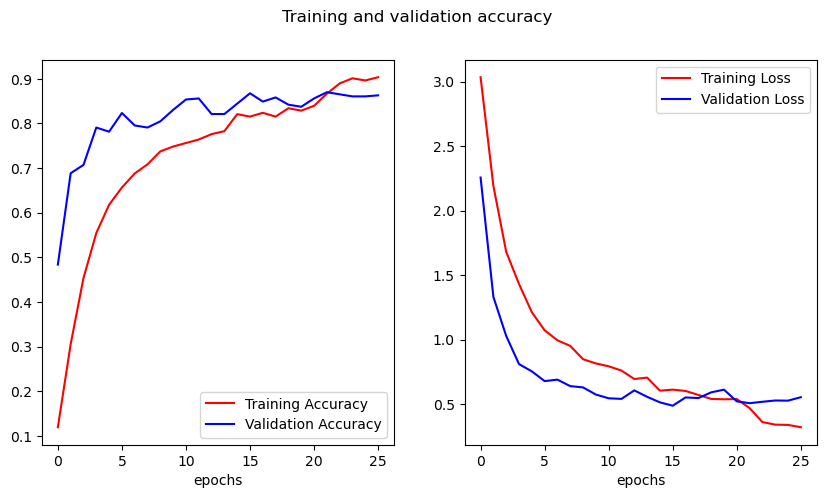

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

In [54]:
# Load the test dataset
test_dataset = test_datagen.flow_from_directory(
    test_dir,
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Predict the classes for the test dataset
predictions = model.predict(test_dataset)
predicted_classes = np.argmax(predictions, axis=1)

# Get the class labels
class_labels = list(test_dataset.class_indices.keys())

# Display the prediction results for each image in the test set
for i, (image_path, predicted_class, actual_class) in enumerate(zip(test_dataset.filepaths, predicted_classes, test_dataset.classes)):
    print(f"Image: {image_path}")
    print(f"Predicted class: {class_labels[predicted_class]}")
    print(f"Actual class: {class_labels[actual_class]}")
    print()

Found 215 images belonging to 17 classes.


215/215 [==============================] - 11s 51ms/step
Image: C:/Users/Ardian/Documents/Kuliah Ardian/Semester 7/Bangkit/Dataset Gabungan\test\Batik Buketan\BatikBuketan (1).jpg
Predicted class: Batik Cendrawasih
Actual class: Batik Buketan

Image: C:/Users/Ardian/Documents/Kuliah Ardian/Semester 7/Bangkit/Dataset Gabungan\test\Batik Buketan\BatikBuketan (2).jpg
Predicted class: Batik Buketan
Actual class: Batik Buketan

Image: C:/Users/Ardian/Documents/Kuliah Ardian/Semester 7/Bangkit/Dataset Gabungan\test\Batik Buketan\BatikBuketan (8).jpg
Predicted class: Batik Buketan
Actual class: Batik Buketan

Image: C:/Users/Ardian/Documents/Kuliah Ardian/Semester 7/Bangkit/Dataset Gabungan\test\Batik Buketan\BatikBuketan (9).jpg
Predicted class: Batik Buketan
Actual class: Batik Buketan

Image: C:/Users/Ardian/Documents/Kuliah Ardian/Semester 7/Bangkit/Dataset Gabungan\test\Batik Buketan\buketan_269.jpg
Predicted class: Batik Buketan
Actual class: Batik Buketan

Image: C:/Users/Ardian/Docume

In [31]:
# Konversi model ke format TFLite
def save_model_as_tflite(model, save_path):
    # Konversi model ke format TFLite
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()
    
    # Menyimpan model TFLite ke file
    with open(save_path, "wb") as f:
        f.write(tflite_model)
    print(f"Model telah disimpan di: {save_path}")

# Path untuk menyimpan model TFLite
save_directory = r"C:/Users/Ardian/Documents/Kuliah Ardian/Semester 7/Bangkit/Dataset Gabungan"
os.makedirs(save_directory, exist_ok=True)  # Buat direktori jika belum ada
save_path = os.path.join(save_directory, "model.tflite")

# Simpan model ke TFLite
save_model_as_tflite(model, save_path)

INFO:tensorflow:Assets written to: C:\Users\Ardian\AppData\Local\Temp\tmpm2ls2g2f\assets


INFO:tensorflow:Assets written to: C:\Users\Ardian\AppData\Local\Temp\tmpm2ls2g2f\assets


Model telah disimpan di: C:/Users/Ardian/Documents/Kuliah Ardian/Semester 7/Bangkit/Dataset Gabungan\model.tflite
